
```
cifar10  : 데이터셋 중에 10가지로 분류
cifar100 : 데이터셋 100가지로 분류
```



```
CNN (이미지)
RNN (언어)
```



In [1]:
#CIFAR10
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)


Text(0.5, 1.0, 'frog')

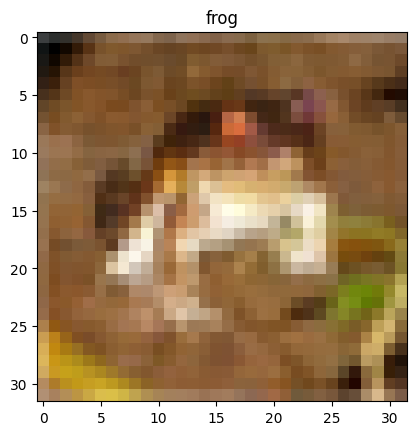

In [5]:
plt.imshow(X_train[0])
plt.title(labelNames[y_train[0][0]])

In [6]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [7]:
#X data 처리
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [8]:
#y preprocessing
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
print(y_train_ohe)
y_test_phe = to_categorical(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
#model 구축 64 -> 32 -> 10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape = (32, 32,3)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_ohe, epochs = 10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,082 (777.66 KB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2706 - loss: 1.9996
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3662 - loss: 1.7677
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3932 - loss: 1.7009
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4080 - loss: 1.6527
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4172 - loss: 1.6326
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4262 - loss: 1.6028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4342 - loss: 1.5870
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4362 - loss: 1.5751
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4413 - loss: 1.5535
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4531 - loss: 1.5454


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
automobile
cat


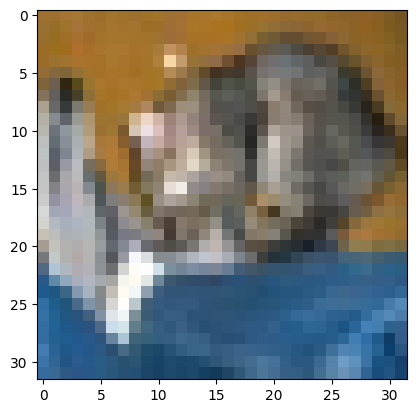

In [10]:
y_predictions = model.predict(X_test_scaled)
plt.imshow(X_test[0])
print(labelNames[np.argmax(y_predictions[0])])
print(labelNames[y_test[0][0]])

In [11]:
y_predictions_list = [np.argmax(p) for p in y_predictions]
print(y_predictions_list[:5])
#print(y_test[:5]) 바로 비교가 안 되 flatten
#타입도 리스트로 맞춰주기
y_test_flatten = list(y_test.flatten())
print(y_test_flatten[:5])

[1, 8, 8, 1, 4]
[3, 8, 8, 0, 6]


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
print(y_test_flatten)
print(y_predictions_list)
#얘네 비교해서 몇 개 맞았나

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [14]:
cm = confusion_matrix(y_test_flatten, y_predictions_list)
cm
#0번을, 1번을 뭐라고 했는지. 대각선이 맞은 거

array([[433, 159,  27,  59,  19,  45,  18,  61, 108,  71],
       [  9, 742,   8,  30,  10,  27,  12,  18,  32, 112],
       [ 83,  65, 126, 101, 127, 168, 170, 121,  19,  20],
       [ 22,  89,  32, 276,  31, 306, 112,  71,  12,  49],
       [ 36,  47,  58,  96, 311, 109, 164, 143,  17,  19],
       [  8,  81,  29, 172,  49, 449,  75,  87,  20,  30],
       [  5,  52,  31, 104,  89, 156, 494,  33,   7,  29],
       [ 22,  84,  17,  64,  66, 121,  29, 503,   9,  85],
       [107, 166,  11,  57,  10,  44,   8,  18, 487,  92],
       [ 16, 367,   2,  25,   5,  29,  21,  40,  50, 445]])

<Axes: >

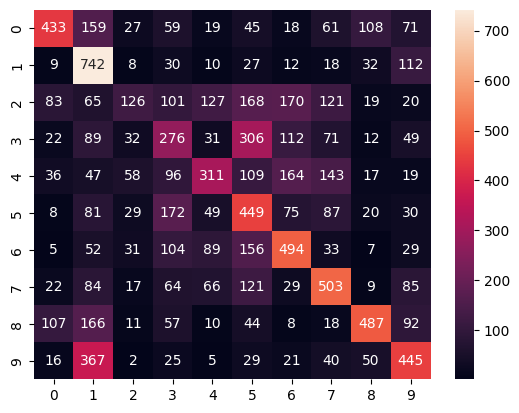

In [15]:
sns.heatmap(cm, annot = True, fmt = 'd')

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

model_conv = Sequential([
    Conv2D(64, kernel_size =(5, 5), padding = 'same', strides  = (2, 2), input_shape = (32, 32, 3)), #필터 64개, 커널사이즈5x5
    MaxPool2D((2, 2)),
    Conv2D(32, kernel_size = (5, 5), padding = 'valid'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model_conv.summary()

model_conv.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model_conv.fit(X_train_scaled, y_train_ohe, epochs = 10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 32)            │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,762 (260.79 KB)

 Trainable params: 66,762 (260.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.3379 - loss: 1.8116
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5419 - loss: 1.2838
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6072 - loss: 1.1081
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6416 - loss: 1.0208
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6644 - loss: 0.9445
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6863 - loss: 0.8883
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7046 - loss: 0.8383
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.7214 - loss: 0.7933
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7288 - loss: 0.7695
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7425 - loss: 0.7379


In [18]:
# y_predict 잡고
# y_test랑 y_predict 비교해서 cm, heatmap 만들기

y_prediction = model_conv.predict(X_test_scaled)
y_prediction_list = [np.argmax(p) for p in y_prediction]
print(y_prediction_list[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[3, 1, 8, 0, 4, 6, 5, 6, 4, 1]


In [19]:
y_test_list = list(y_test.flatten())
y_test_list[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [20]:
cm_conv = confusion_matrix(y_test_list, y_prediction_list)
print(cm_conv)

[[755  17  56  13  33   6   7  10  72  31]
 [ 23 772  11  11  10   8   5   9  35 116]
 [ 64   5 574  39 114  65  44  60  22  13]
 [ 41  14  91 441 110 146  40  56  33  28]
 [ 28   7  78  47 667  26  40  91  13   3]
 [ 19   3  73 187  80 472  23 104  26  13]
 [ 12  10  69  93  87  33 659  15  13   9]
 [ 21   5  31  33  71  62   6 746   9  16]
 [ 76  48  17  12  10   7   2   5 797  26]
 [ 53 111  13  10  12  14   9  26  53 699]]


<Axes: >

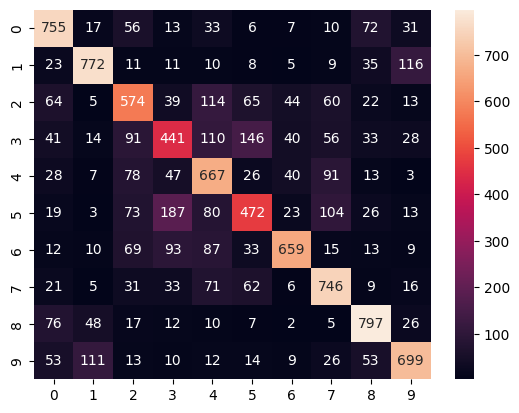

In [21]:
sns.heatmap(cm_conv, annot = True, fmt = 'd')

(32, 32, 3)


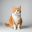

(32, 32, 3)


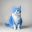

(32, 32, 3)
(32, 32, 3)
(1, 32, 32, 3)
cat


In [33]:
#shape 보고 size 맞추고 /255하고
import cv2
from google.colab.patches import cv2_imshow

cat_img = cv2.imread('/content/cat_.jpg')
print(cat_img.shape)

cv2_imshow(cat_img)
cat_img_resized = cv2.resize(cat_img, (32, 32))
print(cat_img_resized.shape)

cat_img_rgb = cv2.cvtColor(cat_img_resized, cv2.COLOR_BGR2RGB)
cv2_imshow(cat_img_rgb)
print(cat_img_rgb.shape)

#normalize
cat_img_scaled = cat_img_rgb / 255.0
print(cat_img_scaled.shape)

cat_img_batch = np.expand_dims(cat_img_scaled, axis = 0)
print(cat_img_batch.shape)


y_prediction_cat = model_conv(cat_img_batch)
print(labelNames[np.argmax(y_prediction_cat)])

(18, 32, 3)
(32, 32, 3)
(1, 32, 32, 3)
truck


<Axes: >

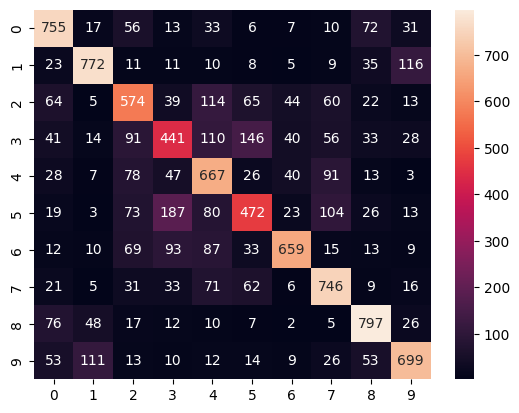

In [35]:
car_img = cv2.imread('/content/car.jpg')
print(car_img.shape)

car_img_resized = cv2.resize(car_img, (32, 32))
print(car_img_resized.shape)

car_img_rgb = cv2.cvtColor(car_img_resized, cv2.COLOR_BGR2RGB)

car_img_scaled = car_img_rgb / 255.0

car_img_batch = np.expand_dims(car_img_scaled, axis = 0)
print(car_img_batch.shape)


y_prediction_car = model_conv(car_img_batch)
print(labelNames[np.argmax(y_prediction_car)])

car_cm_conv = confusion_matrix(y_test_list, y_prediction_list)

sns.heatmap(car_cm_conv, annot = True, fmt = 'd')